In [6]:
import numpy as np

In [7]:
from keras.models import load_model
embNet = load_model('./np_datasets/Blouse/blouse_embNet_a.h5')

/home/inouelab/.conda/envs/keras35/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Load images and resize to (128,128,3) with padding 
shopイメージだけのリストを作りたい

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import random
%matplotlib inline

In [11]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [9]:
BASE_PATH = 'crop_img/img/CLOTHING/Blouse/'
ids = sorted([x for x in os.listdir(BASE_PATH)])

### make "garally" dataset 

In [29]:
garally = []
consumer = []
for id_ in ids:
    files = sorted([BASE_PATH+id_+'/'+x for x in os.listdir(BASE_PATH+id_)])
    con = sorted([x for x in files if 'comsumer' in x])
    shop = sorted([x for x in files if 'shop' in x ])
    for s in shop:
        img = Image.open(s)
        shop_new = expand2square(img, 0).resize((128,128)).convert('RGB')
#         plt.imshow(shop_new)
#         plt.show()
        garally.append(np.array(shop_new))
    for c in con:
        img = Image.open(c)
        con_new = expand2square(img, 0).resize((128,128)).convert('RGB')
#         plt.imshow(con_new)
#         plt.show()
        consumer.append(np.array(con_new))
    
garally = np.array(garally)
consumer = np.array(consumer)

### embedding "garally" dataset

In [30]:
vec_length=10
emb_vecs = np.zeros((len(garally),vec_length))
for i,x in enumerate(garally):
#     print(x.shape)
    emb_vecs[i] = embNet.predict(np.expand_dims(x,axis=0))[0] # need [0] because of expanding dimension -> [[]]

In [31]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [32]:
import random
queries = random.sample(list(consumer),10)

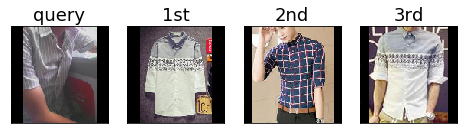

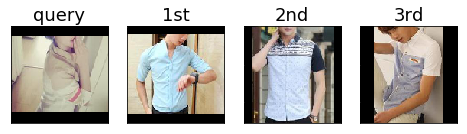

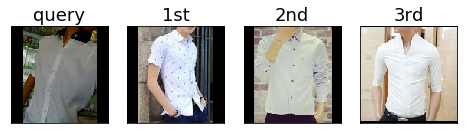

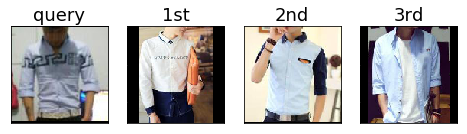

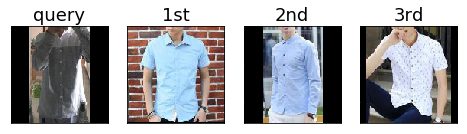

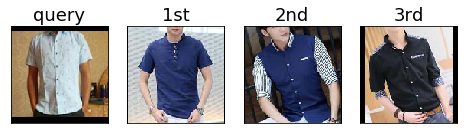

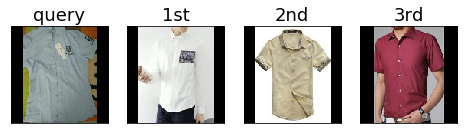

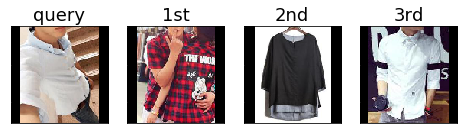

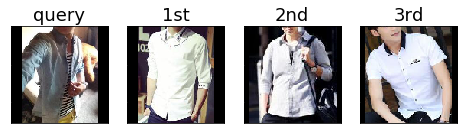

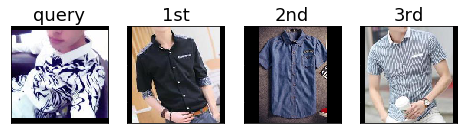

In [41]:
imheight,imwidth=128,128
for query in queries:
    # show query
    plt.figure(figsize=(8,8))
    plt.subplot(1,4,1)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    test = embNet.predict(np.expand_dims((query / 255.).astype(np.float32),axis=0))[0]
    plt.title('query',fontsize=18)
    plt.imshow(query)

    # calc order
    similarities = np.zeros(len(emb_vecs))
    for i,emb_vec in enumerate(emb_vecs):
        similarities[i] = distance(test,emb_vec)
    idxs = similarities.argsort() #ascending order b.c. smaller is better/ get the index array in ascending order
    
    # show nearest
    plt.subplot(1,4,2)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    nearest = garally[idxs[0]]
    plt.title('1st',fontsize=18)
    plt.imshow(nearest)
    
    # show nearest
    plt.subplot(1,4,3)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    second = garally[idxs[1]]
    plt.title('2nd',fontsize=18)
    plt.imshow(second)
    
    # show nearest
    plt.subplot(1,4,4)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    third = garally[idxs[2]]
    plt.title('3rd',fontsize=18)
    plt.imshow(third)
    
